In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [1]:
from google.colab import files

# Upload the file
uploaded = files.upload()

# After uploading, confirm the file name
print("Uploaded Files:", uploaded.keys())


Saving household_power_consumption.txt to household_power_consumption.txt
Uploaded Files: dict_keys(['household_power_consumption.txt'])


In [2]:
import pandas as pd

# Load the dataset
file_name = 'household_power_consumption.txt'  # Update with the correct file name
data = pd.read_csv(file_name, sep=';', low_memory=False)

# Display first 5 rows
data.head()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
# Combine 'Date' and 'Time' into a single 'Datetime' column
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S')

# Drop the old 'Date' and 'Time' columns as we don't need them anymore
data = data.drop(columns=['Date', 'Time'])

# Set 'Datetime' as the index
data.set_index('Datetime', inplace=True)

# Display the first few rows
data.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Optionally, fill missing values with forward fill method
data.fillna(method='ffill', inplace=True)


Missing values in each column:
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64


<ipython-input-4-95efd13410e1>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [7]:
# Fill missing values in 'Sub_metering_3' column using forward fill method
data['Sub_metering_3'].ffill(inplace=True)

# Verify if there are still any missing values
missing_values_after_fill = data.isnull().sum()
print("Missing values after filling:")
print(missing_values_after_fill)


Missing values after filling:
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3               0
dtype: int64


<ipython-input-7-8b60b92651fb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Sub_metering_3'].ffill(inplace=True)


In [8]:
# Check missing values again to confirm columns with issues
missing_values = data.isnull().sum()
print("Missing values in each column before filling:")
print(missing_values)

# Fill the missing values in all columns with the median (a robust method)
data['Global_active_power'].fillna(data['Global_active_power'].median(), inplace=True)
data['Global_reactive_power'].fillna(data['Global_reactive_power'].median(), inplace=True)
data['Voltage'].fillna(data['Voltage'].median(), inplace=True)
data['Global_intensity'].fillna(data['Global_intensity'].median(), inplace=True)
data['Sub_metering_1'].fillna(data['Sub_metering_1'].median(), inplace=True)
data['Sub_metering_2'].fillna(data['Sub_metering_2'].median(), inplace=True)

# Verify if there are still missing values
missing_values_after_fill = data.isnull().sum()
print("Missing values after filling with median:")
print(missing_values_after_fill)


Missing values in each column before filling:
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3               0
dtype: int64
Missing values after filling with median:
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


<ipython-input-8-926137c0321f>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Global_active_power'].fillna(data['Global_active_power'].median(), inplace=True)
<ipython-input-8-926137c0321f>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

In [9]:
# Fill the missing values in each column with the median
data['Global_active_power'] = data['Global_active_power'].fillna(data['Global_active_power'].median())
data['Global_reactive_power'] = data['Global_reactive_power'].fillna(data['Global_reactive_power'].median())
data['Voltage'] = data['Voltage'].fillna(data['Voltage'].median())
data['Global_intensity'] = data['Global_intensity'].fillna(data['Global_intensity'].median())
data['Sub_metering_1'] = data['Sub_metering_1'].fillna(data['Sub_metering_1'].median())
data['Sub_metering_2'] = data['Sub_metering_2'].fillna(data['Sub_metering_2'].median())

# Verify if there are still missing values
missing_values_after_fill = data.isnull().sum()
print("Missing values after filling with median:")
print(missing_values_after_fill)


Missing values after filling with median:
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


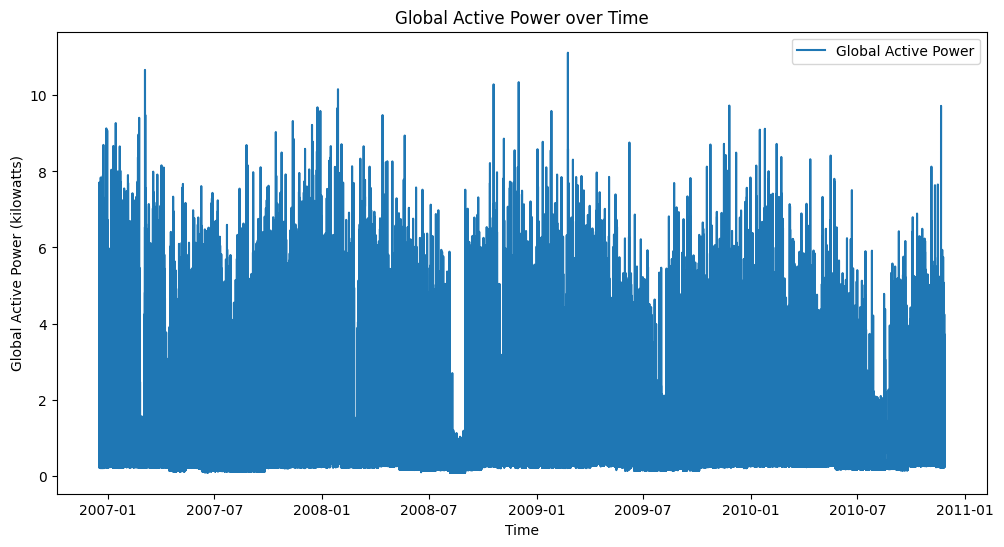

In [10]:
import matplotlib.pyplot as plt

# Plot 'Global_active_power' over time
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Global_active_power'], label='Global Active Power')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kilowatts)')
plt.title('Global Active Power over Time')
plt.legend()
plt.show()


In [11]:
# Create lag feature for 'Global_active_power' (1-hour lag)
data['Global_active_power_lag1'] = data['Global_active_power'].shift(1)

# Check the first few rows to verify the lag feature
print(data[['Global_active_power', 'Global_active_power_lag1']].head())


                     Global_active_power  Global_active_power_lag1
Datetime                                                          
2006-12-16 17:24:00                4.216                       NaN
2006-12-16 17:25:00                5.360                     4.216
2006-12-16 17:26:00                5.374                     5.360
2006-12-16 17:27:00                5.388                     5.374
2006-12-16 17:28:00                3.666                     5.388


In [12]:
# Forward fill missing values in lagged feature
data['Global_active_power_lag1'].fillna(method='ffill', inplace=True)

# Verify the missing values are handled
print(data[['Global_active_power', 'Global_active_power_lag1']].head())


                     Global_active_power  Global_active_power_lag1
Datetime                                                          
2006-12-16 17:24:00                4.216                       NaN
2006-12-16 17:25:00                5.360                     4.216
2006-12-16 17:26:00                5.374                     5.360
2006-12-16 17:27:00                5.388                     5.374
2006-12-16 17:28:00                3.666                     5.388


<ipython-input-12-6fe8d87c9e50>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Global_active_power_lag1'].fillna(method='ffill', inplace=True)
<ipython-input-12-6fe8d87c9e50>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Global_active_power_lag1'].fillna(method='ffill', inplace=True)


In [13]:
# Forward fill missing values in lagged feature
data['Global_active_power_lag1'] = data['Global_active_power_lag1'].ffill()

# Verify the missing values are handled
print(data[['Global_active_power', 'Global_active_power_lag1']].head())


                     Global_active_power  Global_active_power_lag1
Datetime                                                          
2006-12-16 17:24:00                4.216                       NaN
2006-12-16 17:25:00                5.360                     4.216
2006-12-16 17:26:00                5.374                     5.360
2006-12-16 17:27:00                5.388                     5.374
2006-12-16 17:28:00                3.666                     5.388


In [14]:
# Forward fill missing values in lagged feature
data['Global_active_power_lag1'] = data['Global_active_power_lag1'].ffill()

# If the first value is still missing, backfill it
data['Global_active_power_lag1'] = data['Global_active_power_lag1'].bfill()

# Verify the missing values are handled
print(data[['Global_active_power', 'Global_active_power_lag1']].head())


                     Global_active_power  Global_active_power_lag1
Datetime                                                          
2006-12-16 17:24:00                4.216                     4.216
2006-12-16 17:25:00                5.360                     4.216
2006-12-16 17:26:00                5.374                     5.360
2006-12-16 17:27:00                5.388                     5.374
2006-12-16 17:28:00                3.666                     5.388


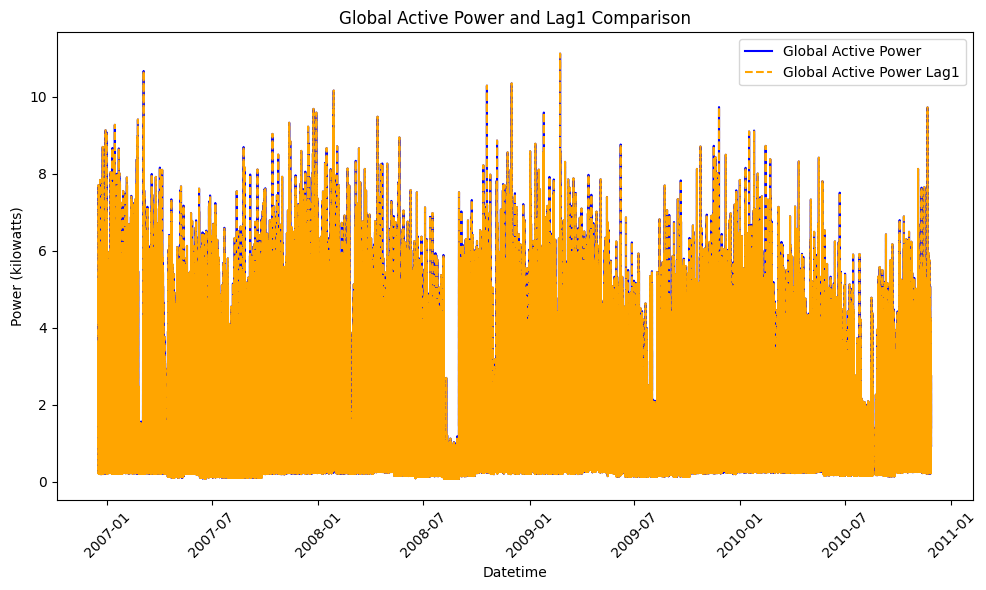

In [15]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Global_active_power'], label='Global Active Power', color='blue')
plt.plot(data.index, data['Global_active_power_lag1'], label='Global Active Power Lag1', color='orange', linestyle='--')
plt.xlabel('Datetime')
plt.ylabel('Power (kilowatts)')
plt.title('Global Active Power and Lag1 Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
# Calculate the correlation between the two columns
correlation = data['Global_active_power'].corr(data['Global_active_power_lag1'])

# Print the correlation value
print(f"Correlation between Global_active_power and Global_active_power_lag1: {correlation}")


Correlation between Global_active_power and Global_active_power_lag1: 0.9680156312213238


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare the features and target
X = data[['Global_active_power_lag1']]  # Feature
y = data['Global_active_power']  # Target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Optional: Print the model coefficients
print(f"Model Coefficients: {model.coef_}")


Mean Squared Error: 0.046449704287150055
Model Coefficients: [0.9677386]


In [18]:
# Add additional lags to the data
data['Global_active_power_lag2'] = data['Global_active_power'].shift(2)
data['Global_active_power_lag3'] = data['Global_active_power'].shift(3)

# Drop rows with NaN values (which will be introduced by the new lags)
data = data.dropna()

# Display the updated data
print(data.head())


                     Global_active_power  Global_reactive_power  Voltage  \
Datetime                                                                   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   
2006-12-16 17:29:00                3.520                  0.522   235.02   
2006-12-16 17:30:00                3.702                  0.520   235.09   
2006-12-16 17:31:00                3.700                  0.520   235.22   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
Datetime                                                                
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00              15.8             0.0             1.0   
2006-12-16 17:29:00              15.0             0.0             2.0   
2006-12-16 17:30:00              15.8             0.0             1.0   
2006-12-16 17:31:00          

In [19]:
# Calculate the correlation between Global_active_power and its lags
correlations = data[['Global_active_power', 'Global_active_power_lag1', 'Global_active_power_lag2', 'Global_active_power_lag3']].corr()
print(correlations)


                          Global_active_power  Global_active_power_lag1  \
Global_active_power                  1.000000                  0.968015   
Global_active_power_lag1             0.968015                  1.000000   
Global_active_power_lag2             0.933791                  0.968016   
Global_active_power_lag3             0.906703                  0.933791   

                          Global_active_power_lag2  Global_active_power_lag3  
Global_active_power                       0.933791                  0.906703  
Global_active_power_lag1                  0.968016                  0.933791  
Global_active_power_lag2                  1.000000                  0.968015  
Global_active_power_lag3                  0.968015                  1.000000  


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features (lags) and target variable
features = data[['Global_active_power_lag1', 'Global_active_power_lag2', 'Global_active_power_lag3']]
target = data['Global_active_power']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R²
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 0.046365596368782895
R² Score: 0.9395439792471494


In [21]:
# Checking for missing values in the dataset
print("Missing values before handling:")
print(data.isnull().sum())

# Filling missing values with forward fill method
data.fillna(method='ffill', inplace=True)

print("\nMissing values after handling:")
print(data.isnull().sum())


Missing values before handling:
Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            0
Sub_metering_1              0
Sub_metering_2              0
Sub_metering_3              0
Global_active_power_lag1    0
Global_active_power_lag2    0
Global_active_power_lag3    0
dtype: int64


<ipython-input-21-b695ea9be96a>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)



Missing values after handling:
Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            0
Sub_metering_1              0
Sub_metering_2              0
Sub_metering_3              0
Global_active_power_lag1    0
Global_active_power_lag2    0
Global_active_power_lag3    0
dtype: int64


In [22]:
# Create a new feature: power ratio between Global_active_power and Global_reactive_power
data['power_ratio'] = data['Global_active_power'] / data['Global_reactive_power']

# Display the new feature to check
print(data[['Global_active_power', 'Global_reactive_power', 'power_ratio']].head())


                     Global_active_power  Global_reactive_power  power_ratio
Datetime                                                                    
2006-12-16 17:27:00                5.388                  0.502    10.733068
2006-12-16 17:28:00                3.666                  0.528     6.943182
2006-12-16 17:29:00                3.520                  0.522     6.743295
2006-12-16 17:30:00                3.702                  0.520     7.119231
2006-12-16 17:31:00                3.700                  0.520     7.115385


In [23]:
# Define features and target variable
X = data[['Global_active_power', 'Global_active_power_lag1', 'Global_active_power_lag2',
          'Global_active_power_lag3', 'power_ratio']]  # Include the new feature
y = data['Global_active_power']  # Target variable

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Re-train the model (Linear Regression)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


ValueError: Input X contains infinity or a value too large for dtype('float64').

In [24]:
# Check for any NaN values in the features
print("Checking for NaN values in the features:")
print(X.isna().sum())  # This will give the number of missing values in each feature


Checking for NaN values in the features:
Global_active_power         0
Global_active_power_lag1    0
Global_active_power_lag2    0
Global_active_power_lag3    0
power_ratio                 0
dtype: int64


In [26]:
import numpy as np

# Check for infinity values in the features
print("Checking for infinity values in the features:")
print((X == np.inf).sum())  # Count of infinity values in each feature
print((X == -np.inf).sum())  # Count of negative infinity values in each feature


Checking for infinity values in the features:
Global_active_power              0
Global_active_power_lag1         0
Global_active_power_lag2         0
Global_active_power_lag3         0
power_ratio                 481561
dtype: int64
Global_active_power         0
Global_active_power_lag1    0
Global_active_power_lag2    0
Global_active_power_lag3    0
power_ratio                 0
dtype: int64


In [28]:
# Replace infinity values in power_ratio with NaN
X.loc[:, 'power_ratio'] = X['power_ratio'].replace([np.inf, -np.inf], np.nan)

# Fill NaN values with the median
X.loc[:, 'power_ratio'] = X['power_ratio'].fillna(X['power_ratio'].median())


In [29]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (1660204, 5)
Test set shape: (415052, 5)


In [30]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Print the model's coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Model Coefficients: [ 1.00000000e+00  1.14367646e-16 -8.91951628e-17 -2.41129517e-16
  6.97692464e-18]
Model Intercept: 6.661338147750939e-16


In [31]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R² Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 8.990130353066646e-31
R² Score: 1.0


In [32]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Evaluate the model
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test Set Mean Squared Error: {mse_test}")
print(f"Test Set R² Score: {r2_test}")


Test Set Mean Squared Error: 8.990130353066646e-31
Test Set R² Score: 1.0


In [33]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Perform K-Fold Cross Validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive
cv_scores = np.abs(cv_scores)

# Output the cross-validation results
print(f"Cross-Validation MSE scores: {cv_scores}")
print(f"Mean CV MSE: {cv_scores.mean()}")
print(f"Standard Deviation of CV MSE: {cv_scores.std()}")


Cross-Validation MSE scores: [2.85108283e-31 6.07083856e-30 1.41243744e-30 1.04135367e-30
 1.59100348e-30]
Mean CV MSE: 2.0801482836681285e-30
Standard Deviation of CV MSE: 2.045090321648436e-30


In [34]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Ridge model with a regularization parameter (alpha)
ridge_model = Ridge(alpha=1.0)

# Train the model on the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the training and test set
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

# Evaluate performance using MSE and R² score
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Output the results
print(f"Training MSE (Ridge): {train_mse}")
print(f"Test MSE (Ridge): {test_mse}")
print(f"Training R² (Ridge): {train_r2}")
print(f"Test R² (Ridge): {test_r2}")


Training MSE (Ridge): 5.4648513643563654e-12
Test MSE (Ridge): 5.4677487106918644e-12
Training R² (Ridge): 0.9999999999950602
Test R² (Ridge): 0.9999999999950696


In [35]:
from sklearn.linear_model import Lasso

# Initialize Lasso model with a regularization parameter (alpha)
lasso_model = Lasso(alpha=0.1)

# Train the model on the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the training and test set
y_train_pred_lasso = lasso_model.predict(X_train)
y_test_pred_lasso = lasso_model.predict(X_test)

# Evaluate performance using MSE and R² score
train_mse_lasso = mean_squared_error(y_train, y_train_pred_lasso)
test_mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
train_r2_lasso = r2_score(y_train, y_train_pred_lasso)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)

# Output the results
print(f"Training MSE (Lasso): {train_mse_lasso}")
print(f"Test MSE (Lasso): {test_mse_lasso}")
print(f"Training R² (Lasso): {train_r2_lasso}")
print(f"Test R² (Lasso): {test_r2_lasso}")


Training MSE (Lasso): 0.012897306557479702
Test MSE (Lasso): 0.01290126507947049
Training R² (Lasso): 0.9883417240874601
Test R² (Lasso): 0.9883665328553617


In [36]:
from sklearn.linear_model import ElasticNet

# Initialize ElasticNet model with alpha and l1_ratio (L1 + L2 regularization)
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Train the model on the training data
elasticnet_model.fit(X_train, y_train)

# Make predictions on the training and test set
y_train_pred_elasticnet = elasticnet_model.predict(X_train)
y_test_pred_elasticnet = elasticnet_model.predict(X_test)

# Evaluate performance using MSE and R² score
train_mse_elasticnet = mean_squared_error(y_train, y_train_pred_elasticnet)
test_mse_elasticnet = mean_squared_error(y_test, y_test_pred_elasticnet)
train_r2_elasticnet = r2_score(y_train, y_train_pred_elasticnet)
test_r2_elasticnet = r2_score(y_test, y_test_pred_elasticnet)

# Output the results
print(f"Training MSE (ElasticNet): {train_mse_elasticnet}")
print(f"Test MSE (ElasticNet): {test_mse_elasticnet}")
print(f"Training R² (ElasticNet): {train_r2_elasticnet}")
print(f"Test R² (ElasticNet): {test_r2_elasticnet}")


Training MSE (ElasticNet): 0.014299945607200737
Test MSE (ElasticNet): 0.014298415225414383
Training R² (ElasticNet): 0.9870738350926167
Test R² (ElasticNet): 0.9871066796379568


In [37]:
from sklearn.model_selection import GridSearchCV

# Define the model
ridge = Ridge()

# Define the hyperparameter grid
param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}

# Set up the GridSearchCV
grid_search_ridge = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search_ridge.fit(X_train, y_train)

# Best hyperparameters found by GridSearchCV
best_params_ridge = grid_search_ridge.best_params_

# Best model
best_ridge_model = grid_search_ridge.best_estimator_

# Best score (Mean Squared Error) achieved during the search
best_score_ridge = grid_search_ridge.best_score_

# Training the best model on the whole training set
best_ridge_model.fit(X_train, y_train)

# Test the model on the test set
test_mse_ridge = mean_squared_error(y_test, best_ridge_model.predict(X_test))
test_r2_ridge = r2_score(y_test, best_ridge_model.predict(X_test))

print("Best Parameters for Ridge:", best_params_ridge)
print("Best Cross-Validation MSE for Ridge:", best_score_ridge)
print("Test Set MSE for Ridge:", test_mse_ridge)
print("Test Set R² for Ridge:", test_r2_ridge)


Best Parameters for Ridge: {'alpha': 0.1}
Best Cross-Validation MSE for Ridge: -8.540111016883927e-14
Test Set MSE for Ridge: 5.467927845910507e-14
Test Set R² for Ridge: 0.9999999999999507


In [38]:
from sklearn.linear_model import Lasso

# Define the model
lasso = Lasso()

# Define the hyperparameter grid
param_grid_lasso = {'alpha': [0.1, 1, 10, 100, 1000]}

# Set up the GridSearchCV
grid_search_lasso = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search_lasso.fit(X_train, y_train)

# Best hyperparameters found by GridSearchCV
best_params_lasso = grid_search_lasso.best_params_

# Best model
best_lasso_model = grid_search_lasso.best_estimator_

# Best score (Mean Squared Error) achieved during the search
best_score_lasso = grid_search_lasso.best_score_

# Training the best model on the whole training set
best_lasso_model.fit(X_train, y_train)

# Test the model on the test set
test_mse_lasso = mean_squared_error(y_test, best_lasso_model.predict(X_test))
test_r2_lasso = r2_score(y_test, best_lasso_model.predict(X_test))

print("Best Parameters for Lasso:", best_params_lasso)
print("Best Cross-Validation MSE for Lasso:", best_score_lasso)
print("Test Set MSE for Lasso:", test_mse_lasso)
print("Test Set R² for Lasso:", test_r2_lasso)


Best Parameters for Lasso: {'alpha': 0.1}
Best Cross-Validation MSE for Lasso: -0.012897630844291385
Test Set MSE for Lasso: 0.01290126507947049
Test Set R² for Lasso: 0.9883665328553617


In [39]:
from sklearn.linear_model import ElasticNet

# Define the model
elasticnet = ElasticNet()

# Define the hyperparameter grid
param_grid_en = {'alpha': [0.1, 1, 10, 100, 1000]}

# Set up the GridSearchCV
grid_search_en = GridSearchCV(elasticnet, param_grid_en, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search_en.fit(X_train, y_train)

# Best hyperparameters found by GridSearchCV
best_params_en = grid_search_en.best_params_

# Best model
best_en_model = grid_search_en.best_estimator_

# Best score (Mean Squared Error) achieved during the search
best_score_en = grid_search_en.best_score_

# Training the best model on the whole training set
best_en_model.fit(X_train, y_train)

# Test the model on the test set
test_mse_en = mean_squared_error(y_test, best_en_model.predict(X_test))
test_r2_en = r2_score(y_test, best_en_model.predict(X_test))

print("Best Parameters for ElasticNet:", best_params_en)
print("Best Cross-Validation MSE for ElasticNet:", best_score_en)
print("Test Set MSE for ElasticNet:", test_mse_en)
print("Test Set R² for ElasticNet:", test_r2_en)


Best Parameters for ElasticNet: {'alpha': 0.1}
Best Cross-Validation MSE for ElasticNet: -0.014300531048647296
Test Set MSE for ElasticNet: 0.014298415225414383
Test Set R² for ElasticNet: 0.9871066796379568


In [42]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for each model
ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
elasticnet_param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Define models
ridge = Ridge()
lasso = Lasso()
elasticnet = ElasticNet()

# Perform GridSearchCV for each model
ridge_cv = GridSearchCV(ridge, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_cv = GridSearchCV(lasso, lasso_param_grid, cv=5, scoring='neg_mean_squared_error')
elasticnet_cv = GridSearchCV(elasticnet, elasticnet_param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit each model to the training data
ridge_cv.fit(X_train, y_train)
lasso_cv.fit(X_train, y_train)
elasticnet_cv.fit(X_train, y_train)

# Get the best model from each grid search
ridge_best_model = ridge_cv.best_estimator_
lasso_best_model = lasso_cv.best_estimator_
elasticnet_best_model = elasticnet_cv.best_estimator_


In [43]:
# Define the evaluation function if it's not already defined:
def evaluate_model_metrics(model, X_test, y_test):
    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the metrics
    print(f"Mean Squared Error: {mse}")
    print(f"R² Score: {r2}")

# Evaluate the best models
print("Ridge Model Evaluation:")
evaluate_model_metrics(ridge_best_model, X_test, y_test)

print("\nLasso Model Evaluation:")
evaluate_model_metrics(lasso_best_model, X_test, y_test)

print("\nElasticNet Model Evaluation:")
evaluate_model_metrics(elasticnet_best_model, X_test, y_test)


Ridge Model Evaluation:
Mean Squared Error: 5.467946879127662e-16
R² Score: 0.9999999999999996

Lasso Model Evaluation:
Mean Squared Error: 0.0001283172276064061
R² Score: 0.999884292413011

ElasticNet Model Evaluation:
Mean Squared Error: 0.00035233503680692237
R² Score: 0.9996822886709675
